In [87]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import ppscore as pps

In [88]:
df = pd.read_csv('student_data.csv')

In [89]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [90]:
df.shape

(395, 33)

In [91]:
df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


### Lets check for missing values 

In [92]:
df.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

There are no missing values which is a good thing

### Now lets for correlation between variables 

The heatmap shows us that Fedu,Medu and studytime have some effects on our grades

In [93]:
G_avg = df['G1']+df['G2']+df['G3']
df['G_avg'] = G_avg

In [94]:
pps_matrix = pps.matrix(df).pivot(columns='x', index='y',  values='ppscore')


In [95]:
pps_matrix

x,Dalc,Fedu,Fjob,G1,G2,G3,G_avg,Medu,Mjob,Pstatus,...,internet,nursery,paid,reason,romantic,school,schoolsup,sex,studytime,traveltime
y,,,,,,,,,,,,,,,,,,,,,
Dalc,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Fedu,0.000000,1.000000,0.122335,0.013882,0.010157,0.005194,0.000000,0.275863,0.093448,0.000000,...,0.012956,0.021232,0.000000,0.000000,0.000000,0.000372,0.000000,0.000000,0.009894,0.013558
Fjob,0.053403,0.000000,1.000000,0.000000,0.028829,0.093672,0.102822,0.000000,0.078270,0.000000,...,0.000000,0.000000,0.000000,0.015904,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
G1,0.005388,0.025236,0.000000,1.000000,0.587035,0.552685,0.681588,0.009416,0.003848,0.000000,...,0.001062,0.000000,0.000000,0.000000,0.000000,0.000000,0.015538,0.000000,0.000000,0.000000
G2,0.000000,0.024828,0.002642,0.539259,1.000000,0.692459,0.782295,0.014011,0.003292,0.000000,...,0.000278,0.000000,0.000000,0.000000,0.000000,0.000000,0.016446,0.004415,0.000000,0.008447
G3,0.000000,0.000000,0.000000,0.427117,0.662352,1.000000,0.788409,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
G_avg,0.000671,0.020843,0.000000,0.651751,0.786529,0.801083,1.000000,0.012898,0.001996,0.000000,...,0.002477,0.000000,0.000000,0.000000,0.000000,0.000000,0.020280,0.003891,0.000000,0.003490
Medu,0.000000,0.221985,0.009581,0.000000,0.000000,0.000000,0.000000,1.000000,0.275729,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Mjob,0.000000,0.033725,0.173458,0.045004,0.000000,0.035926,0.000000,0.098090,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


<AxesSubplot:>

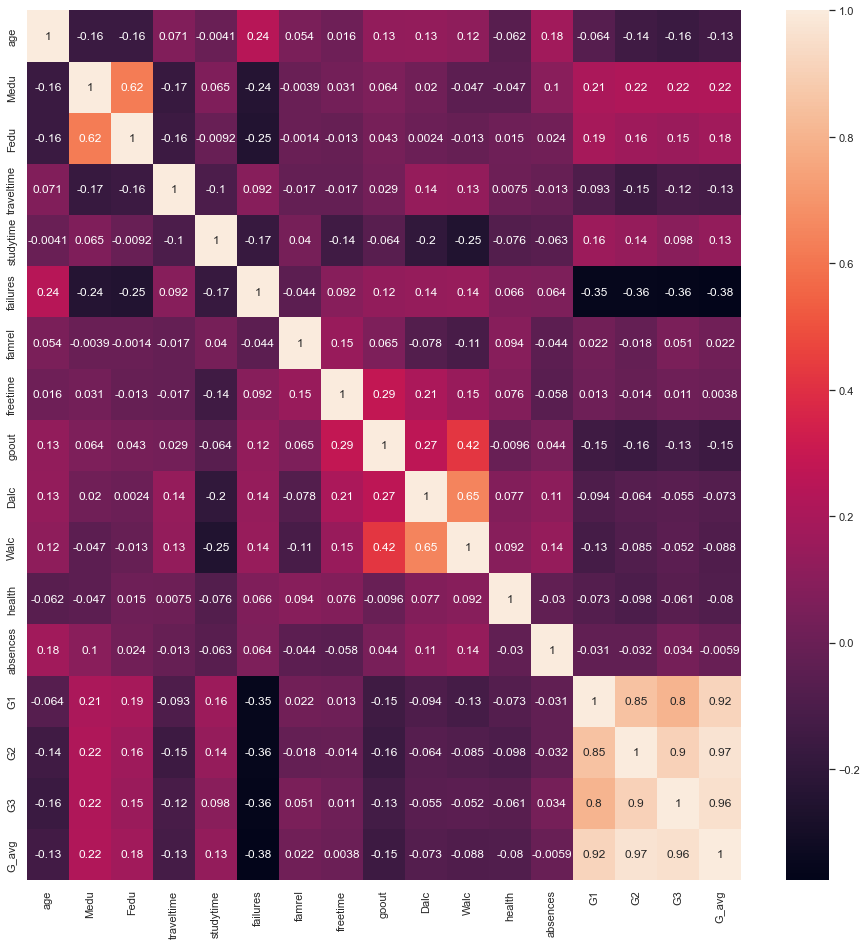

In [96]:
# we will use a heatmap to visualize correlations among different variables
sb.set(rc={"figure.figsize":(16, 16)})
sb.heatmap(df.corr(),annot=True)

In [97]:
sb.set(style= 'whitegrid', color_codes=True)
sb.set_theme(context='notebook',style='darkgrid',
              palette='deep',font='sans-serif',font_scale=1,color_codes=True,rc=None)

<AxesSubplot:xlabel='x', ylabel='y'>

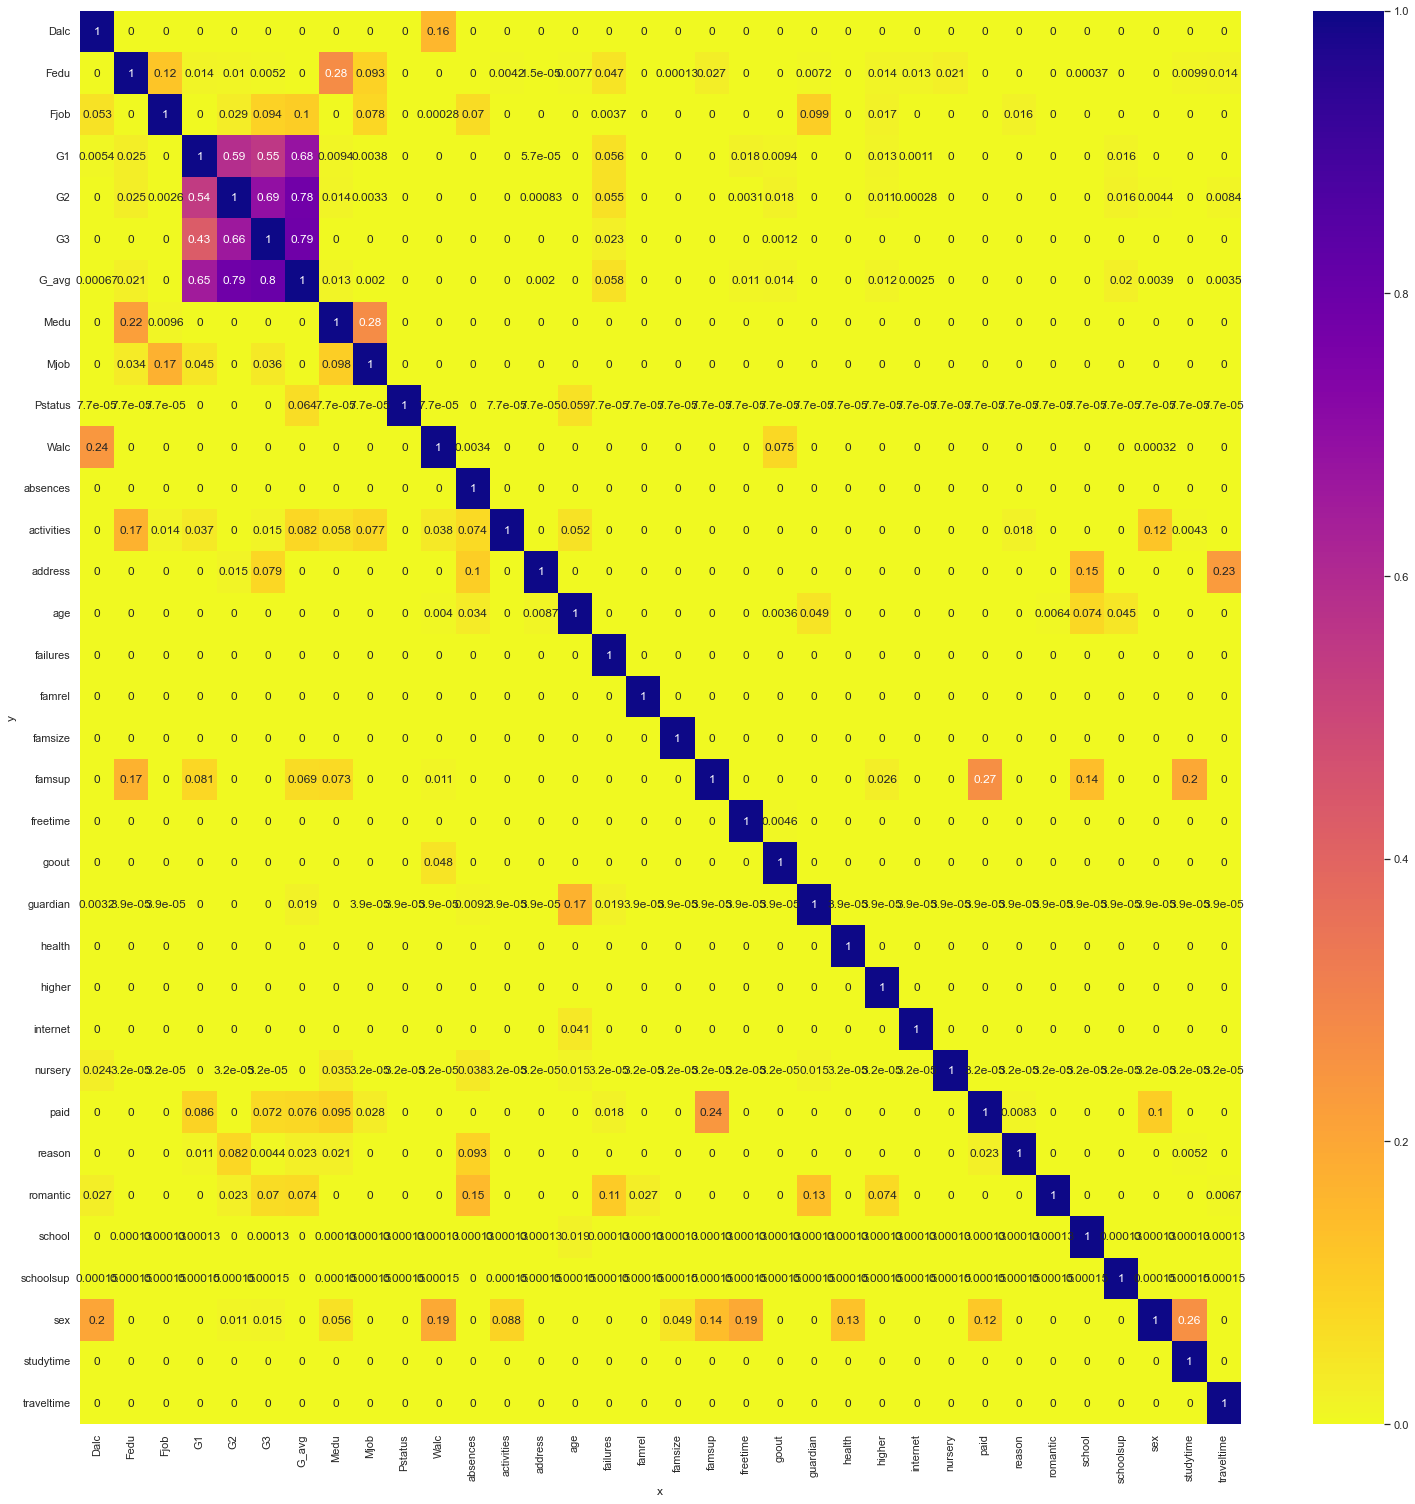

In [98]:
sb.set(rc={"figure.figsize":(26, 26)})
sb.heatmap(pps_matrix,annot=True,cmap="plasma_r")

### We are going to add the mean of average grade score as its easier to do further analysis and calculation

In [99]:
df.head(2)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,G_avg
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,3,4,1,1,3,6,5,6,6,17
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,3,1,1,3,4,5,5,6,16


In [100]:
df.Dalc.unique()

array([1, 2, 5, 3, 4], dtype=int64)

In [101]:
df.Pstatus.unique()

array(['A', 'T'], dtype=object)

<AxesSubplot:xlabel='Medu', ylabel='G_avg'>

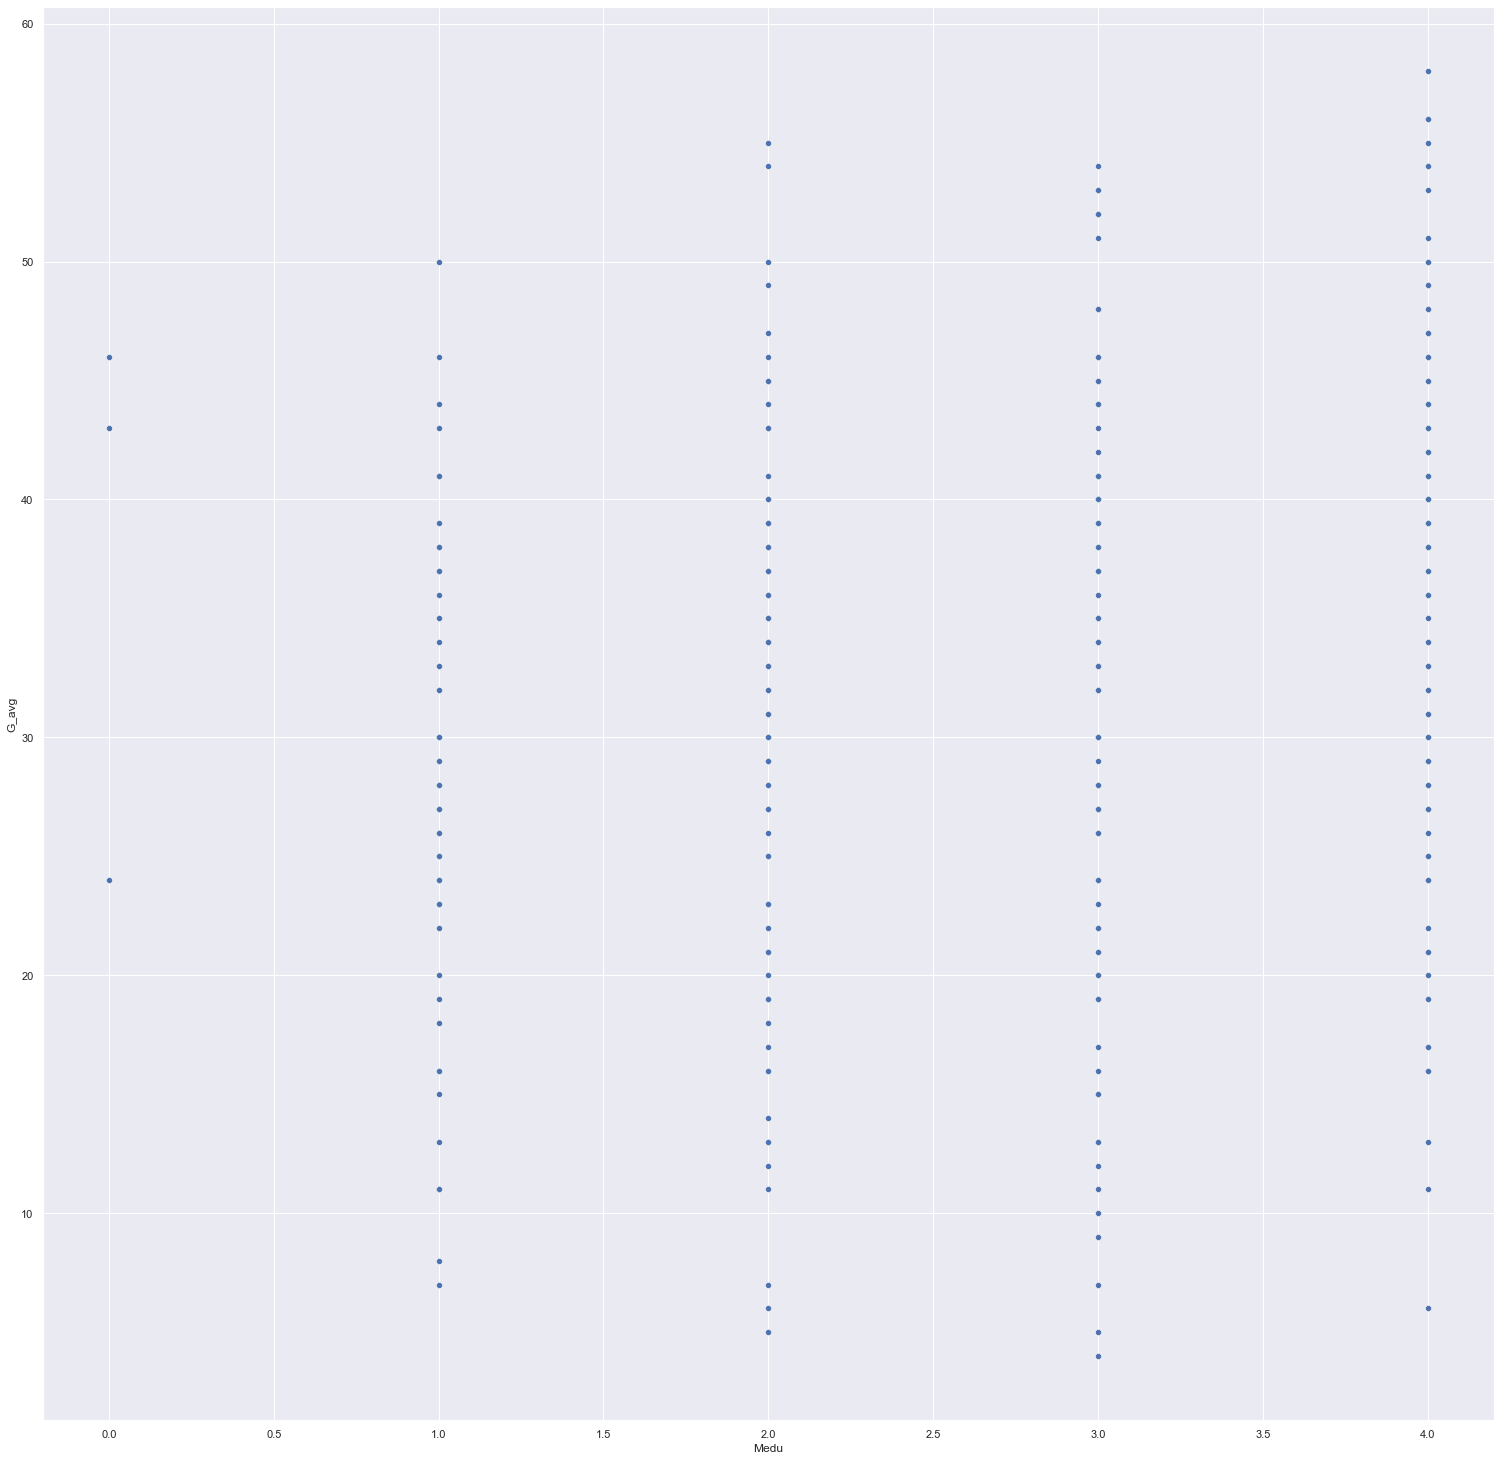

In [102]:
sb.scatterplot(x=df['Medu'],y=df['G_avg'],data=df)

<AxesSubplot:xlabel='sex', ylabel='count'>

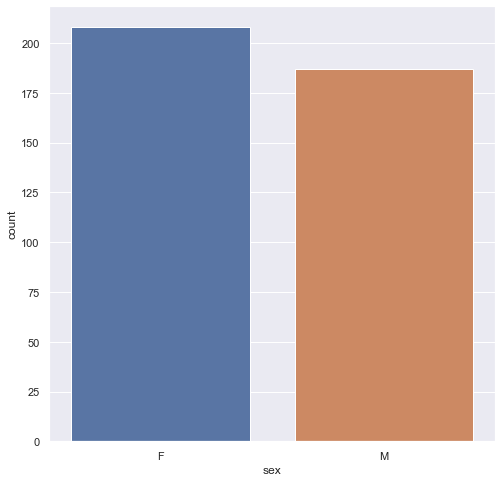

In [103]:
# lets check the count of sex to see if the data is biased or not
sb.set(rc={"figure.figsize":(8, 8)})
sb.countplot(x=df['sex'],data=df)

<AxesSubplot:xlabel='sex', ylabel='G_avg'>

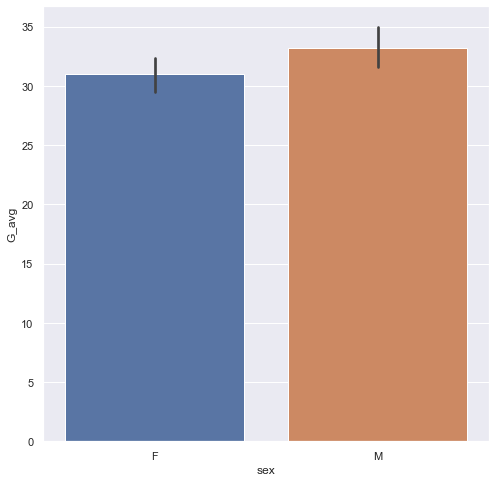

In [104]:
sb.barplot(x=df.sex,y=df.G_avg)

No effect of different amount of count values have on the average grade avaerage.

In [105]:
df[df['sex']=='F']['G_avg'].mean()

30.97596153846154

### Lets see what are the type of occupation both mother and father of the students have

In [106]:
df['Mjob'].unique()

array(['at_home', 'health', 'other', 'services', 'teacher'], dtype=object)

In [107]:
df['Fjob'].unique()

array(['teacher', 'other', 'services', 'health', 'at_home'], dtype=object)

<AxesSubplot:xlabel='Fjob'>

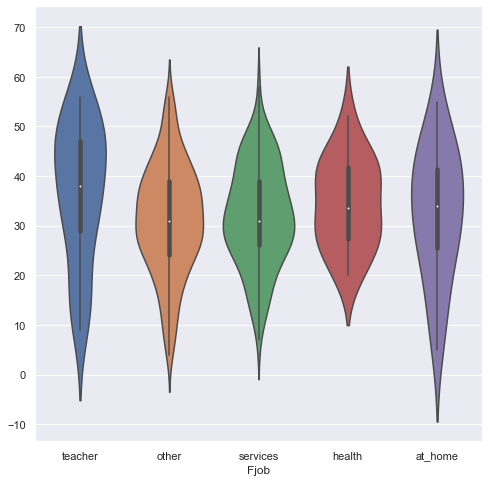

In [108]:
sb.violinplot(x=df.Fjob,y=G_avg,data=df)

We can say students whose father are themselves in teaching feild have average grade points higher than students from other feilds. Also stay at home father's childeren also performing good.

<AxesSubplot:xlabel='Mjob', ylabel='G_avg'>

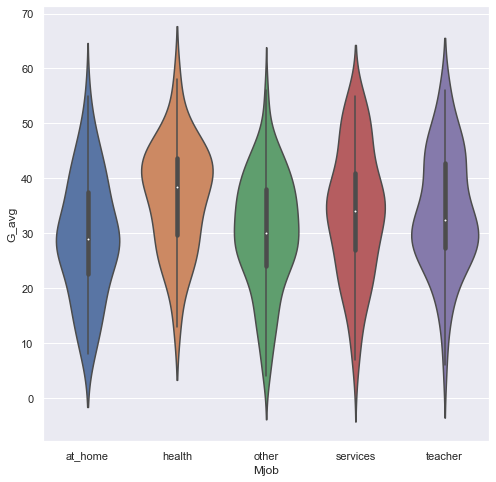

In [109]:
sb.violinplot(x=df.Mjob,y=df.G_avg,data=df)

In [112]:
df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,G_avg
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190,32.037975
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443,11.090357
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000,4.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000,25.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000,32.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000,40.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000,58.000000


We can say that Mothers who works in medical feild have children with higher Grade scores than others. You can see the density of students whose mothers are from Medical feild have 